In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans

In [11]:
data = pd.read_csv('Mall_Customers.csv')

In [13]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
x = data.iloc[:,[3,4]].values

In [18]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### WCSS --> within cluster sum of square

In [23]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++' , random_state=42 )
    kmeans.fit(x)

    wcss.append(kmeans.inertia_)

C:\Users\darshan.rathod.-nd\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\darshan.rathod.-nd\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\darshan.rathod.-nd\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\darshan.rathod.-nd\AppData\Local\anaconda3\Lib

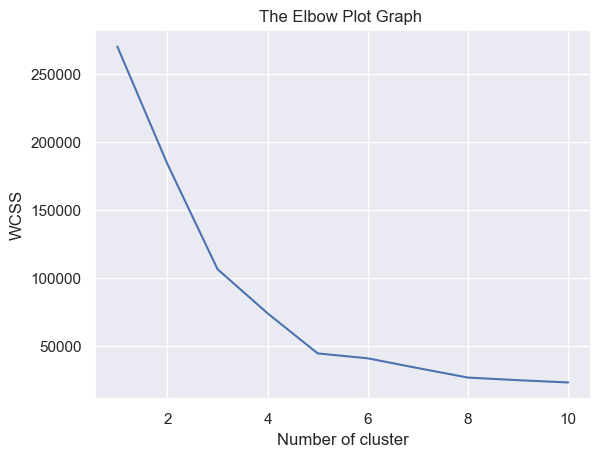

In [29]:
sns.set()
plt.plot(range(1,11) , wcss)
plt.title("The Elbow Plot Graph ")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")

plt.show()

In [35]:
### training the K-means Clustering Model 

In [37]:
kmeans = KMeans(n_clusters=5 , init='k-means++' , random_state=0 )

# Return label for each data point based on their cluster 
y = kmeans.fit_predict(x)

print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


C:\Users\darshan.rathod.-nd\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
### Visualising all the Cluster

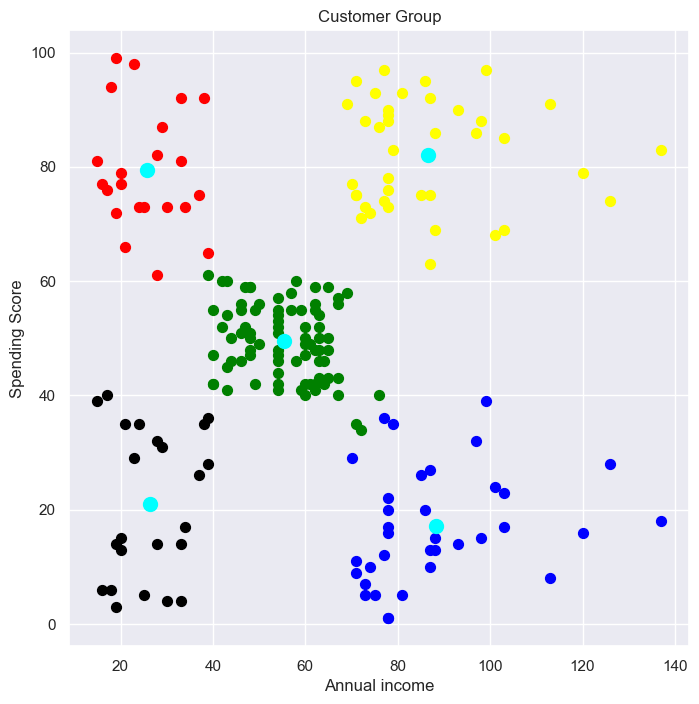

In [41]:
# printing all the cluster and their centroid 

plt.figure(figsize=(8,8))
plt.scatter(x[y== 0,0] , x[y== 0,1] , s=50 , c='green', label = 'cluster 1' )
plt.scatter(x[y== 1,0] , x[y== 1,1] , s=50 , c='Yellow', label = 'cluster 2' )
plt.scatter(x[y== 2,0] , x[y== 2,1] , s=50 , c='blue', label = 'cluster 3' )
plt.scatter(x[y== 3,0] , x[y== 3,1] , s=50 , c='black', label = 'cluster 4' )
plt.scatter(x[y== 4,0] , x[y== 4,1] , s=50 , c='red', label = 'cluster 5' )

# plot the centroid 

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], s= 100 , c='cyan' , label= 'Centroid')

plt.title('Customer Group')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.show()